**Preface:** smarter people have developed SymPy and it appears to work well with my prior testings, generating the expected results, without their contribution I would have not been able to meticulously calculate the complex matrices that describe the robotic arm chosen for this project. Give them a like: [SymPy Docs](https://docs.sympy.org/latest/index.html)!

In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sympy import (Symbol, Matrix, cos, sin, pi, Eq, pprint, print_latex, MatMul, trigsimp, transpose)

# Forward Kinematics

In this section, we generate the forward kinematics symbolically; we did not perform the  as the larger 

In [2]:
def transformation_matrix(a, alpha, d, theta):
    return Matrix([
        [cos(theta), -sin(theta) * cos(alpha), sin(theta) * sin(alpha), a * cos(theta)],
        [sin(theta), cos(theta) * cos(alpha), -cos(theta) * sin(alpha), a * sin(theta)],
        [0, sin(alpha), cos(alpha), d],
        [0, 0, 0, 1]
    ])

In [3]:
display(transformation_matrix(Symbol('a_n'), Symbol('alpha_n'), Symbol('d_n'), Symbol('theta_n')))

Matrix([
[cos(theta_n), -sin(theta_n)*cos(alpha_n),  sin(alpha_n)*sin(theta_n), a_n*cos(theta_n)],
[sin(theta_n),  cos(alpha_n)*cos(theta_n), -sin(alpha_n)*cos(theta_n), a_n*sin(theta_n)],
[           0,               sin(alpha_n),               cos(alpha_n),              d_n],
[           0,                          0,                          0,                1]])

In [4]:
n_joints = 8

# Define a's
a = [0 for _ in range(n_joints)]
a[1] = Symbol("a_2")
print(f"a = {a}")

# Define alphas
alpha = [pi/2 for _ in range(n_joints)]
alpha[1] = alpha[-1] = 0
alpha[3] *= -1
alpha[-2] = alpha[3]
print(f"alpha = {alpha}")

# Define d's
d = [Symbol(f"d_{i}") for i in range(1, n_joints+1)]
d[1] = d[2] = d[-3] = d[-2] = 0
print(f"d = {d}")

# define thetas
theta = [Symbol(f"theta_{i}^*") for i in range(1, n_joints+1)]
theta[0] += pi/2
theta[2] += pi/2
theta[-3] += pi/2
print(f"theta = {theta}")

a = [0, a_2, 0, 0, 0, 0, 0, 0]
alpha = [pi/2, 0, pi/2, -pi/2, pi/2, pi/2, -pi/2, 0]
d = [d_1, 0, 0, d_4, d_5, 0, 0, d_8]
theta = [theta_1^* + pi/2, theta_2^*, theta_3^* + pi/2, theta_4^*, theta_5^*, theta_6^* + pi/2, theta_7^*, theta_8^*]


In [5]:
T = []
T_exps = []
for i in range(0, n_joints):
    matrix_exp = Symbol(f"^{i}T_{i+1}")
    T.append(transformation_matrix(a[i], alpha[i], d[i], theta[i]))
    eq = Eq(matrix_exp, T[i], evaluate=False)
    T_exps.append(eq)
    display(eq)
    # print_latex(eq)

Eq(^0T_1, Matrix([
[-sin(theta_1^*), 0, cos(theta_1^*),   0],
[ cos(theta_1^*), 0, sin(theta_1^*),   0],
[              0, 1,              0, d_1],
[              0, 0,              0,   1]]))

Eq(^1T_2, Matrix([
[cos(theta_2^*), -sin(theta_2^*), 0, a_2*cos(theta_2^*)],
[sin(theta_2^*),  cos(theta_2^*), 0, a_2*sin(theta_2^*)],
[             0,               0, 1,                  0],
[             0,               0, 0,                  1]]))

Eq(^2T_3, Matrix([
[-sin(theta_3^*), 0, cos(theta_3^*), 0],
[ cos(theta_3^*), 0, sin(theta_3^*), 0],
[              0, 1,              0, 0],
[              0, 0,              0, 1]]))

Eq(^3T_4, Matrix([
[cos(theta_4^*),  0, -sin(theta_4^*),   0],
[sin(theta_4^*),  0,  cos(theta_4^*),   0],
[             0, -1,               0, d_4],
[             0,  0,               0,   1]]))

Eq(^4T_5, Matrix([
[cos(theta_5^*), 0,  sin(theta_5^*),   0],
[sin(theta_5^*), 0, -cos(theta_5^*),   0],
[             0, 1,               0, d_5],
[             0, 0,               0,   1]]))

Eq(^5T_6, Matrix([
[-sin(theta_6^*), 0, cos(theta_6^*), 0],
[ cos(theta_6^*), 0, sin(theta_6^*), 0],
[              0, 1,              0, 0],
[              0, 0,              0, 1]]))

Eq(^6T_7, Matrix([
[cos(theta_7^*),  0, -sin(theta_7^*), 0],
[sin(theta_7^*),  0,  cos(theta_7^*), 0],
[             0, -1,               0, 0],
[             0,  0,               0, 1]]))

Eq(^7T_8, Matrix([
[cos(theta_8^*), -sin(theta_8^*), 0,   0],
[sin(theta_8^*),  cos(theta_8^*), 0,   0],
[             0,               0, 1, d_8],
[             0,               0, 0,   1]]))

## Transformation Matrix
The transformation matrix is large, but shows us how the pose of the arm changes relative to the angles of the joints.

In [6]:
T_08 = trigsimp(MatMul(*T, evaluate=True))
display(Eq(Symbol("^0T_8"), T_08, evaluate=False))

Eq(^0T_8, Matrix([
[((-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*cos(theta_6^*))*cos(theta_7^*) + ((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*sin(theta_5^*) - sin(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_7^*))*cos(theta_8^*) + (-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*cos(theta_6^*) - (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*sin(theta_6^*))*sin(theta_8^*), -((-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* +

## Translation Matrix
The following is the translation matrix portion of the Transformation Matrix, showing the position relative to angle.

In [7]:
t = T_08[:-1, -1]
display(Eq(Symbol("t"), t, evaluate=False))

Eq(t, Matrix([
[-a_2*sin(theta_1^*)*cos(theta_2^*) - d_4*sin(theta_1^*)*cos(theta_2^* + theta_3^*) + d_5*(-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*)) + d_8*(-(-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*cos(theta_6^*))*sin(theta_7^*) + ((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*sin(theta_5^*) - sin(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*cos(theta_7^*))],
[   a_2*cos(theta_1^*)*cos(theta_2^*) + d_4*cos(theta_1^*)*cos(theta_2^* + theta_3^*) + d_5*(sin(theta_1^*)*cos(theta_4^*) + sin(theta_4^*)*sin(theta_2^* + theta_3^*)*cos(theta_1^*)) + d_8*(-(-((sin(theta_1^*)*sin(theta_4^*) - sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*))*cos(theta_5^*)

## Rotation Matrix

Similarly, the following rotation matrix of the Transformation Matrix describes - well - the rotation!

In [8]:
R = T_08[:-1,:-1]
display(Eq(Symbol("R"), R, evaluate=False))

Eq(R, Matrix([
[((-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*cos(theta_6^*))*cos(theta_7^*) + ((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*sin(theta_5^*) - sin(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_7^*))*cos(theta_8^*) + (-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*cos(theta_6^*) - (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*sin(theta_6^*))*sin(theta_8^*), -((-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + the

# Jacobian
In this section we derive the full Jacobain of the system. The system can be derived through $J = \begin{bmatrix}J_v \\ J_\omega\end{bmatrix}$ where $J_v$ represents the linear Jacobian and $J_\omega$ is the angular Jacobian.

## Linear Jacobian
The linear Jacobian is $J_v \in R^{3 \times 8}$. It can be computed by computing the partial differentials of the translation matrix $t$ w.r.t. the workspace variables $q$.

$$ J_v = \begin{bmatrix} 
\dfrac{\partial t_x}{\partial q_1} & \dfrac{\partial t_x}{\partial q_2} & ... & \dfrac{\partial t_x}{\partial q_8} \\
\dfrac{\partial t_y}{\partial q_1} & \dfrac{\partial t_y}{\partial q_2} & ... & \dfrac{\partial t_y}{\partial q_8} \\
\dfrac{\partial t_z}{\partial q_1} & \dfrac{\partial t_z}{\partial q_2} & ... & \dfrac{\partial t_z}{\partial q_8} \\
\end{bmatrix} $$

In our case, our workspace variable $q_i = \theta^*_i$ as all our actuating joints are revolute.

In [9]:
# Define q as workspace variables (could just reuse thetas, but for clarity I won't)
q = Matrix([Symbol(f"theta_{i}^*") for i in range(1, n_joints+1)])
q.T

Matrix([[theta_1^*, theta_2^*, theta_3^*, theta_4^*, theta_5^*, theta_6^*, theta_7^*, theta_8^*]])

In [10]:
J_linear = t.jacobian(q)
display(Eq(Symbol("J_v"), J_linear, evaluate=False))

Eq(J_v, Matrix([
[-a_2*cos(theta_1^*)*cos(theta_2^*) - d_4*cos(theta_1^*)*cos(theta_2^* + theta_3^*) + d_5*(-sin(theta_1^*)*cos(theta_4^*) - sin(theta_4^*)*sin(theta_2^* + theta_3^*)*cos(theta_1^*)) + d_8*(-(-((-sin(theta_1^*)*sin(theta_4^*) + sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*))*cos(theta_5^*) + sin(theta_5^*)*cos(theta_1^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(theta_1^*)*cos(theta_4^*) - sin(theta_4^*)*sin(theta_2^* + theta_3^*)*cos(theta_1^*))*cos(theta_6^*))*sin(theta_7^*) + ((-sin(theta_1^*)*sin(theta_4^*) + sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*))*sin(theta_5^*) - cos(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*cos(theta_7^*)),  a_2*sin(theta_1^*)*sin(theta_2^*) + d_4*sin(theta_1^*)*sin(theta_2^* + theta_3^*) - d_5*sin(theta_1^*)*sin(theta_4^*)*cos(theta_2^* + theta_3^*) + d_8*(-(-(-sin(theta_1^*)*sin(theta_5^*)*sin(theta_2^* + theta_3^*) + sin(theta_1^*)*cos(theta_4^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(th

## Angular Jacobian

The angular Jacobian $J_\omega \in R^{3,8}$. It can be computed by inspecting the axes of rotations (z-axis): $^{0}R^z_{n-1}$ of the rotational matrix. We get $J_\omega = \begin{bmatrix}\rho_1 ^0R^z_0 & \rho_1 ^0R^z_1 & ... & \rho_n ^0R^z_{n-1}\end{bmatrix}$, with $\rho_i = 1 \; \forall i$ since all the joints are revolute.

In [11]:
J_angular = Matrix([1,1,1]) # 0R0 is just identity

for i in range(1, n_joints):
    # Not super efficient, but it'll do
    matrix_exp = Symbol(f"^{0}T_{i}")
    output = trigsimp(MatMul(*T[0:i], evaluate=True))
    eq = Eq(matrix_exp, output, evaluate=False)
    display(eq)
    J_angular = J_angular.row_join(output[:-1, 2])

Eq(^0T_1, Matrix([
[-sin(theta_1^*), 0, cos(theta_1^*),   0],
[ cos(theta_1^*), 0, sin(theta_1^*),   0],
[              0, 1,              0, d_1],
[              0, 0,              0,   1]]))

Eq(^0T_2, Matrix([
[-sin(theta_1^*)*cos(theta_2^*),  sin(theta_1^*)*sin(theta_2^*), cos(theta_1^*), -a_2*sin(theta_1^*)*cos(theta_2^*)],
[ cos(theta_1^*)*cos(theta_2^*), -sin(theta_2^*)*cos(theta_1^*), sin(theta_1^*),  a_2*cos(theta_1^*)*cos(theta_2^*)],
[                sin(theta_2^*),                 cos(theta_2^*),              0,           a_2*sin(theta_2^*) + d_1],
[                             0,                              0,              0,                                  1]]))

Eq(^0T_3, Matrix([
[ sin(theta_1^*)*sin(theta_2^* + theta_3^*), cos(theta_1^*), -sin(theta_1^*)*cos(theta_2^* + theta_3^*), -a_2*sin(theta_1^*)*cos(theta_2^*)],
[-sin(theta_2^* + theta_3^*)*cos(theta_1^*), sin(theta_1^*),  cos(theta_1^*)*cos(theta_2^* + theta_3^*),  a_2*cos(theta_1^*)*cos(theta_2^*)],
[                cos(theta_2^* + theta_3^*),              0,                 sin(theta_2^* + theta_3^*),           a_2*sin(theta_2^*) + d_1],
[                                         0,              0,                                          0,                                  1]]))

Eq(^0T_4, Matrix([
[sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*),  sin(theta_1^*)*cos(theta_2^* + theta_3^*), -sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*), -(a_2*cos(theta_2^*) + d_4*cos(theta_2^* + theta_3^*))*sin(theta_1^*)],
[sin(theta_1^*)*sin(theta_4^*) - sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*), -cos(theta_1^*)*cos(theta_2^* + theta_3^*),  sin(theta_1^*)*cos(theta_4^*) + sin(theta_4^*)*sin(theta_2^* + theta_3^*)*cos(theta_1^*),  (a_2*cos(theta_2^*) + d_4*cos(theta_2^* + theta_3^*))*cos(theta_1^*)],
[                                               cos(theta_4^*)*cos(theta_2^* + theta_3^*),                -sin(theta_2^* + theta_3^*),                                                -sin(theta_4^*)*cos(theta_2^* + theta_3^*),             a_2*sin(theta_2^*) + d_1 + d_4*sin(theta_2^* + theta_3^*)],
[                                                                                      

Eq(^0T_5, Matrix([
[(sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*), -sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*), (sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*sin(theta_5^*) - sin(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*), -a_2*sin(theta_1^*)*cos(theta_2^*) - d_4*sin(theta_1^*)*cos(theta_2^* + theta_3^*) + d_5*(-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))],
[(sin(theta_1^*)*sin(theta_4^*) - sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*))*cos(theta_5^*) - sin(theta_5^*)*cos(theta_1^*)*cos(theta_2^* + theta_3^*),  sin(theta_1^*)*cos(theta_4^*) + sin(theta_4^*)*sin(theta_2^* + theta_3^*)*cos(theta_1^*), (sin(theta_1^*)*sin(theta_4^*) - sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*))*sin(theta_5^*) + cos(thet

Eq(^0T_6, Matrix([
[-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*cos(theta_6^*), (sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*sin(theta_5^*) - sin(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*), ((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*cos(theta_6^*) + (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*sin(theta_6^*), -a_2*sin(theta_1^*)*cos(theta_2^*) - d_4*sin(theta_1^*)*cos(theta_2^* + theta_3^*) + d_5*(-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))],
[ -((sin(theta_1^*)*sin(theta_4^*) - sin(theta

Eq(^0T_7, Matrix([
[(-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*cos(theta_6^*))*cos(theta_7^*) + ((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*sin(theta_5^*) - sin(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_7^*), -((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*cos(theta_6^*) - (-sin(theta_1^*)*sin(theta_4^*)*sin(theta_2^* + theta_3^*) + cos(theta_1^*)*cos(theta_4^*))*sin(theta_6^*), -(-((sin(theta_1^*)*sin(theta_2^* + theta_3^*)*cos(theta_4^*) + sin(theta_4^*)*cos(theta_1^*))*cos(theta_5^*) + sin(theta_1^*)*sin(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(

# Final Jacobian
Putting this together, we get the final Jacobian:

In [12]:
J = J_linear.copy()
J = J.col_join(J_angular)
display(Eq(Symbol("J"), J, evaluate=False))

Eq(J, Matrix([
[-a_2*cos(theta_1^*)*cos(theta_2^*) - d_4*cos(theta_1^*)*cos(theta_2^* + theta_3^*) + d_5*(-sin(theta_1^*)*cos(theta_4^*) - sin(theta_4^*)*sin(theta_2^* + theta_3^*)*cos(theta_1^*)) + d_8*(-(-((-sin(theta_1^*)*sin(theta_4^*) + sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*))*cos(theta_5^*) + sin(theta_5^*)*cos(theta_1^*)*cos(theta_2^* + theta_3^*))*sin(theta_6^*) + (-sin(theta_1^*)*cos(theta_4^*) - sin(theta_4^*)*sin(theta_2^* + theta_3^*)*cos(theta_1^*))*cos(theta_6^*))*sin(theta_7^*) + ((-sin(theta_1^*)*sin(theta_4^*) + sin(theta_2^* + theta_3^*)*cos(theta_1^*)*cos(theta_4^*))*sin(theta_5^*) - cos(theta_1^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*cos(theta_7^*)),  a_2*sin(theta_1^*)*sin(theta_2^*) + d_4*sin(theta_1^*)*sin(theta_2^* + theta_3^*) - d_5*sin(theta_1^*)*sin(theta_4^*)*cos(theta_2^* + theta_3^*) + d_8*(-(-(-sin(theta_1^*)*sin(theta_5^*)*sin(theta_2^* + theta_3^*) + sin(theta_1^*)*cos(theta_4^*)*cos(theta_5^*)*cos(theta_2^* + theta_3^*))*sin(thet

In [13]:
print(J.shape)

(6, 8)


# Trajectory Simulation

In this section, we take the Forward Kinematics & Jacobian generated in the previous section and use them to generate some simulations.

In [14]:
import numpy as np
from scipy.interpolate import CubicSpline

In [15]:
# Some helper functions
def get_pos(T_mat):
    return np.array(T_mat[:-1, -1], dtype=float).reshape(-1)
    
def get_rot(T_mat):
    return np.array(T_mat[:-1,:-1], dtype=float).reshape(-1)

def manipulability(J):
    return np.sqrt(np.linalg.det(J @ J.T))

In [16]:
# Set rng seed
np.random.seed(115)

# Time
t_start = 0
t_end = 10
ts = np.linspace(t_start, t_end)
dt = ts[1] - ts[0]

# Correction constant
ctrl_gain = 2

# DH Params; for simplicity, let's make a_i=d_i=1; theta_i = random
a_subs = {f"a_{i}": 1 for i, ae in enumerate(a, 1) if ae}
d_subs = {f"d_{i}": 1 for i, dee in enumerate(d, 1) if dee}
theta_subs = {f"theta_{i}^*": np.random.uniform(-1, 1) * (2*np.pi) for i, _ in enumerate(theta, 1)}
q_subs = {**a_subs, **d_subs, **theta_subs} # Workspace variable substitutions for SymPy

# Target Positions
target_pos = np.random.uniform(-0.5, 1, 3)
init_pos = np.random.uniform(-0.5, 1, 3)

# Lists to store data
x = [get_pos(T_08.subs(q_subs))]
mu = [manipulability(np.array(J_linear.subs(q_subs), dtype=float))]
vel = [0]

# Get the time for important positional locations
t_turns = np.array([t_start, np.random.uniform(t_start, t_end // 4), t_end])
turns_pos = np.vstack([x[0], init_pos, target_pos]) # x,y,z as rows

# Plan cubic trajectory (function)
f_traj = CubicSpline(t_turns, turns_pos)
planned_traj = f_traj(ts)  

for i, t in enumerate(ts[1:], 1):
    # print(f"Computing location at: {t}")
    
    v = planned_traj[i, :] - x[i-1]
    vel.append(np.linalg.norm(v))
    
    J_v = np.array(J_linear.subs(q_subs), dtype=float)
    q_dot = np.linalg.pinv(J_v) @ v 
    
    assert q_dot.size == n_joints

    q_del = ctrl_gain * q_dot * dt 

    for i, delta in enumerate(q_del, 1):
        q_subs[f"theta_{i}^*"] = q_subs[f"theta_{i}^*"] + delta

    x.append(get_pos(T_08.subs(q_subs)))
    mu.append(manipulability(np.array(J_linear.subs(q_subs), dtype=float)))

## Viz!
In this section, we visualize the simulation for trajectory, manipulability, and velocity profile of the manipulator.

I wanted to make a nice animation, but could not get `ipympl` to work...😒

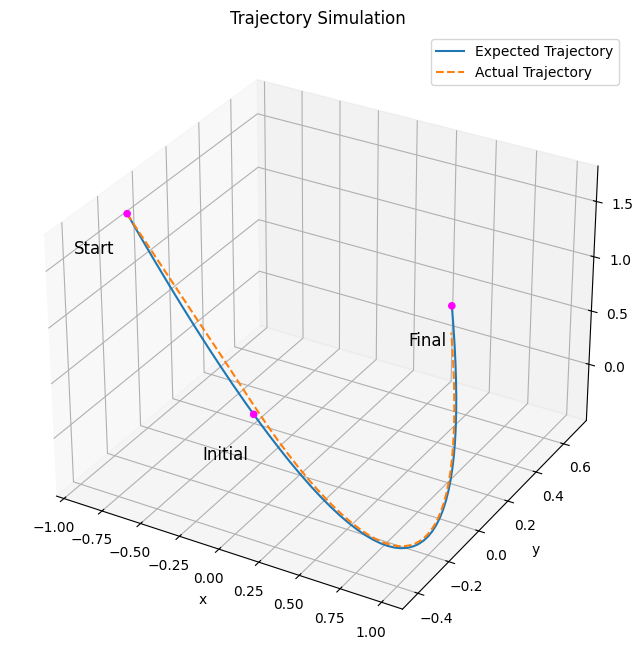

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

traj = f_traj(ts)
ax.plot(traj[:,0], traj[:,1], traj[:,2], label="Expected Trajectory")

actual_pos = np.vstack(x)
ax.plot(actual_pos[:,0], actual_pos[:,1], actual_pos[:,2] ,"--", label="Actual Trajectory")

ax.scatter(turns_pos[:,0], turns_pos[:,1], turns_pos[:,2], alpha=1, c="magenta")
ax.set_title("Trajectory Simulation")

for i, lbl in enumerate(["Start", "Initial", "Final"]):
    ax.text(turns_pos[i,0], turns_pos[i,1] - 0.3, turns_pos[i,2], lbl, fontsize=12)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.legend()
# ax.view_init(elev=30, azim=45)

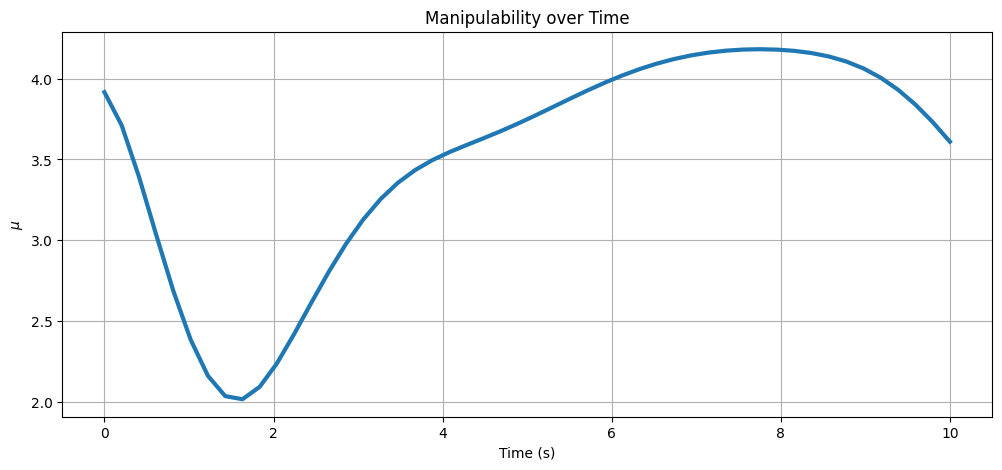

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
ax.grid("True")
ax.set_title("Manipulability over Time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\mu$")
ax.plot(ts, mu, linewidth=3)

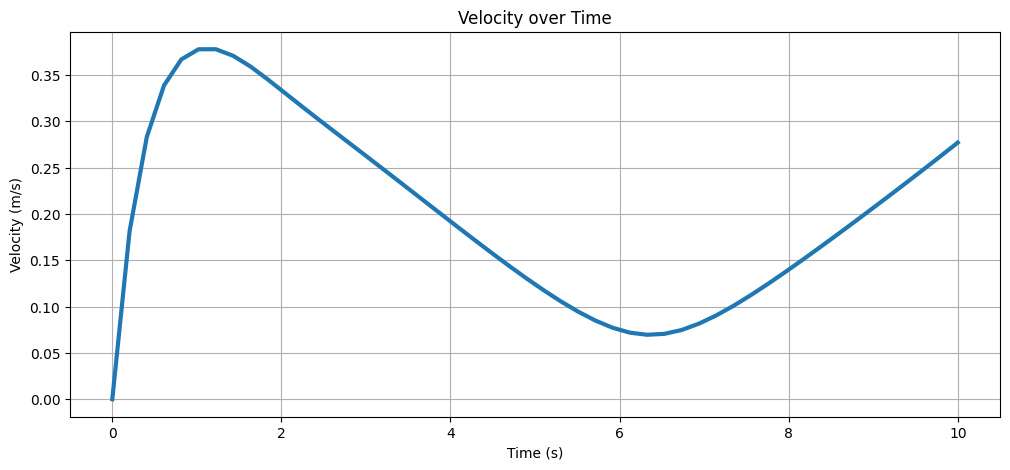

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
ax.grid("True")
ax.set_title("Velocity over Time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.plot(ts, vel, linewidth=3)